In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt

from sklearn import tree
from sklearn.model_selection import (train_test_split, 
                                    cross_val_score,
                                    GridSearchCV)
from sklearn.metrics import (precision_score, 
                            recall_score)
from sklearn.metrics import roc_curve, auc

from IPython.display import (SVG, display, HTML)
from graphviz import Source
%matplotlib inline

In [2]:
train_df = pd.read_csv('titanic_kaggle/train.csv')
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
X = train_df.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis=1)
X = pd.get_dummies(X)
X = X.fillna({'Age': X.Age.median()})
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,False,True,False,False,True
1,1,38.0,1,0,71.2833,True,False,True,False,False
2,3,26.0,0,0,7.9250,True,False,False,False,True
3,1,35.0,1,0,53.1000,True,False,False,False,True
4,3,35.0,0,0,8.0500,False,True,False,False,True


In [4]:
y = train_df.Survived
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [6]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [7]:
clf.fit(X_train, y_train)
clf.score(X_train, y_train)

0.8238255033557047

In [8]:
clf.score(X_test, y_test)

0.8203389830508474

In [9]:
max_depth_values = range(1, 100)

In [10]:
score_data_list = []
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    mean_cross_val_score = cross_val_score(clf, X_train, y_train, cv=5).mean()
    temp_score_data = pd.DataFrame({'max_depth': [max_depth], 
                                    'train_score': [train_score], 
                                    'test_score': [test_score], 
                                    'cross_val_score': [mean_cross_val_score]})
    score_data_list.append(temp_score_data)
scores_data = pd.concat(score_data_list)

In [11]:
scores_data.head()

,max_depth,train_score,test_score,cross_val_score
0,1,0.781879,0.796610,0.781961
0,2,0.805369,0.776271,0.770196
0,3,0.823826,0.820339,0.790322
0,4,0.833893,0.823729,0.788627
0,5,0.840604,0.806780,0.797031


In [12]:
scores_data_long = pd.melt(scores_data, 
                           id_vars=['max_depth'], 
                           value_vars=['train_score', 'test_score', 'cross_val_score'], 
                           var_name='set_type', value_name='score')
scores_data_long.head()

,max_depth,set_type,score
0,1,train_score,0.781879
1,2,train_score,0.805369
2,3,train_score,0.823826
3,4,train_score,0.833893
4,5,train_score,0.840604


In [13]:
scores_data_long.query("set_type == 'cross_val_score'").head(20)

,max_depth,set_type,score
198,1,cross_val_score,0.781961
199,2,cross_val_score,0.770196
200,3,cross_val_score,0.790322
201,4,cross_val_score,0.788627
202,5,cross_val_score,0.797031
203,6,cross_val_score,0.803754
204,7,cross_val_score,0.795336
205,8,cross_val_score,0.798683
206,9,cross_val_score,0.791947
207,10,cross_val_score,0.807073


<Axes: xlabel='max_depth', ylabel='score'>

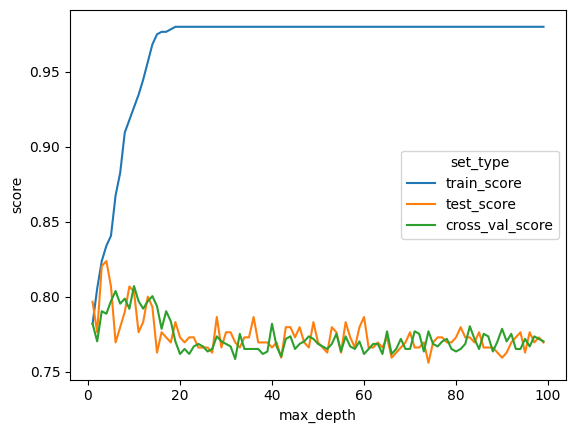

In [14]:
sns.lineplot(x='max_depth', y='score', hue='set_type', data=scores_data_long)

In [15]:
best_clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=10)
best_clf.fit(X_train, y_train)
best_clf.score(X_test, y_test)

0.7898305084745763

# GridSearchCV

In [16]:
clf = tree.DecisionTreeClassifier()

In [17]:
parameters = {'criterion': ['gini', 'entropy'], 'max_depth': range(1, 30)}

In [18]:
grid_search_cv_clf = GridSearchCV(clf, parameters, cv=5)

In [19]:
grid_search_cv_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 30)})

In [20]:
grid_search_cv_clf.best_params_

{'criterion': 'entropy', 'max_depth': 11}

In [21]:
best_clf = grid_search_cv_clf.best_estimator_

In [22]:
best_clf.score(X_test, y_test)

0.7627118644067796

In [23]:
y_pred = best_clf.predict(X_test)

In [24]:
precision_score(y_test, y_pred)

0.7358490566037735

In [25]:
recall_score(y_test, y_pred)

0.65

In [26]:
y_predicted_prob = best_clf.predict_proba(X_test)

<Axes: >

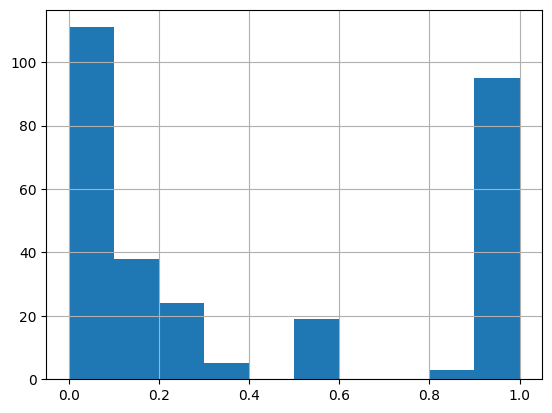

In [27]:
pd.Series(y_predicted_prob[:, 1]).hist()

In [28]:
y_pred = np.where(y_predicted_prob[:, 1] > 0.8, 1, 0)

In [29]:
precision_score(y_test, y_pred)

0.7755102040816326

In [30]:
recall_score(y_test, y_pred)

0.6333333333333333

# Вывод ROC-кривой

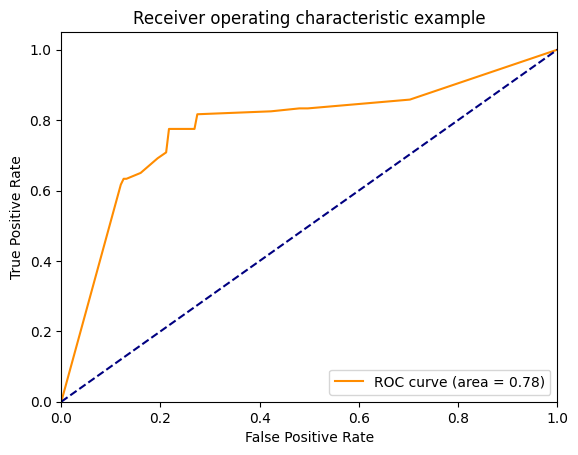

In [31]:
fpr, tpr, thresholds = roc_curve(y_test, y_predicted_prob[:,1])
roc_auc= auc(fpr, tpr)
plt.figure.Figure()
plt.pyplot.plot(fpr, tpr, color='darkorange',
         label='ROC curve (area = %0.2f)' % roc_auc)
plt.pyplot.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.pyplot.xlim([0.0, 1.0])
plt.pyplot.ylim([0.0, 1.05])
plt.pyplot.xlabel('False Positive Rate')
plt.pyplot.ylabel('True Positive Rate')
plt.pyplot.title('Receiver operating characteristic example')
plt.pyplot.legend(loc="lower right")
plt.pyplot.show()